### CSE 5311 - 1002226596 - Handson6

In [ ]:
def qsort(arr, start, end, worst_case = False):
    if start >= end:
        return arr
    if worst_case:
        pivot = arr.index(min(arr[start:end+1])) # for worst case, always take minimum of the array to have maximum number of swaps
    else:
        pivot = (start+end)//2 # fixed
    arr[pivot], arr[end] = arr[end], arr[pivot]
    pivot = end
    left = start
    right = end - 1
    
    while left <= right:
        if arr[left] > arr[pivot] and arr[right] < arr[pivot]:
            arr[left], arr[right] = arr[right], arr[left]
            left += 1
            right -= 1
        elif arr[left] <= arr[pivot]:
            left += 1
        elif arr[right] >= arr[pivot]:
            right -= 1
   
    arr[left], arr[end] = arr[end], arr[left]
    qsort(arr, start, left - 1)
    qsort(arr, left+1, end)
    return arr

def quick_sort(A, worst_case = False):
    qsort(A, 0, len(A)-1, worst_case=worst_case)

In [35]:
import numpy as np
from time import perf_counter
from copy import copy
N = [(i+1000)*10 for i in range(1000)]
arrays = {}
for n in N:
    arrays.update({n: np.random.randint(0, 1000, n).tolist()})

In [36]:
# 2a. Best Case
best_times = []
for n in N:
    arr = copy(arrays[n])
    arr = list(sorted(arr)) # Sorted for Best Case
    t1 = perf_counter()
    quick_sort(arr)
    best_times.append(perf_counter() - t1)

In [ ]:
# 2b. Worst Case
worst_times = []
for n in N:
    arr = copy(arrays[n])
    t1 = perf_counter()
    quick_sort(arr, worst_case=True)
    worst_times.append(perf_counter() - t1)

In [38]:
# 2c. Average Case - Uniform distribution
average_times = []
for n in N:
    arr = copy(arrays[n]) # As per numpy docs, np.random.randint returns random integers from the “discrete uniform” distribution.
    t1 = perf_counter()
    quick_sort(arr)
    average_times.append(perf_counter() - t1)

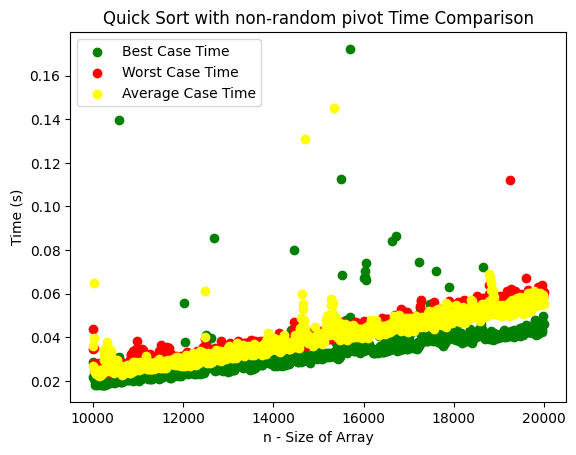

In [47]:
import matplotlib.pyplot as plt

plt.scatter(N, best_times, label = "Best Case Time", color = 'green')
plt.scatter(N, worst_times, label = "Worst Case Time", color = 'red')
plt.scatter(N, average_times, label = "Average Case Time", color = 'yellow')
plt.title("Quick Sort with non-random pivot Time Comparison")
plt.xlabel("n - Size of Array")
plt.ylabel("Time (s)")
plt.legend(loc = "upper left")
plt.show()